Selected Classes: ['ramen', 'ice_cream', 'grilled_salmon']
Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)   

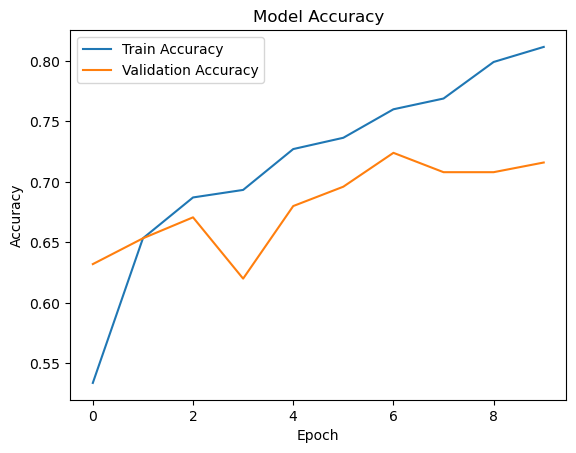

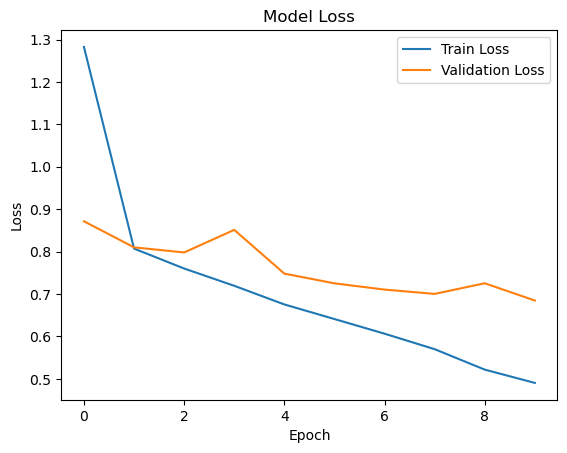

24/24 [==============================] - 12s 498ms/step - loss: 0.6846 - accuracy: 0.7160
Test Accuracy: 0.7160000205039978
24/24 [==============================] - 13s 473ms/step
Confusion Matrix:
[[91 71 88]
 [93 72 85]
 [87 76 87]]

Classification Report:
                precision    recall  f1-score   support

         ramen       0.34      0.36      0.35       250
     ice_cream       0.33      0.29      0.31       250
grilled_salmon       0.33      0.35      0.34       250

      accuracy                           0.33       750
     macro avg       0.33      0.33      0.33       750
  weighted avg       0.33      0.33      0.33       750



In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Задайте шляхи до директорій
train_data_dir = './train'
test_data_dir = './test'

# Вибір та вивід трьох класів для класифікації
selected_classes = ['ramen', 'ice_cream', 'grilled_salmon']
print("Selected Classes:", selected_classes)

# Розмір зображення
image_size = (224, 224)

# Завантаження та попередня обробка даних
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=image_size, classes=selected_classes, batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=image_size, classes=selected_classes, batch_size=32, class_mode='categorical')

# Створення моделі CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(selected_classes), activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Вивід структури моделі
model.summary()

# Тренування моделі
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# Візуалізація точності та функції втрат
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Оцінка моделі на тестовому наборі
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

# Побудова матриці плутанини та вивід звіту класифікації
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = predictions.argmax(axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, target_names=selected_classes)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Found 250 images belonging to 1 classes.
Found 250 images belonging to 1 classes.
Found 250 images belonging to 1 classes.
1/1 [==============================] - 0s 397ms/step


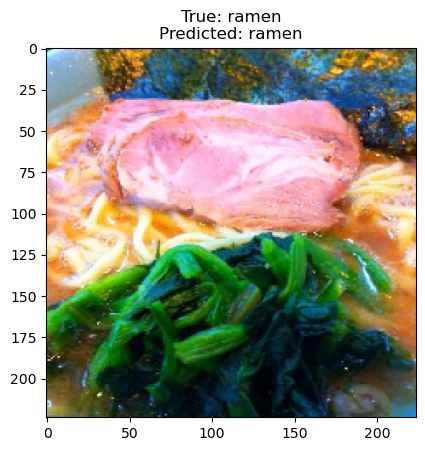

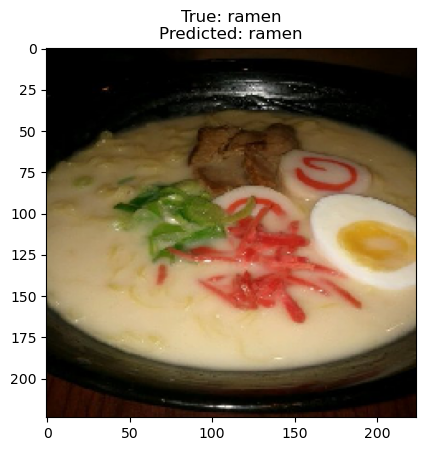

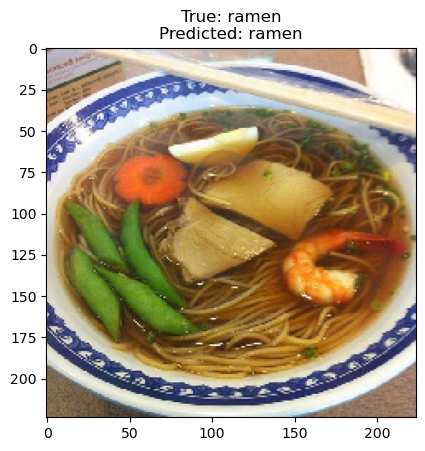

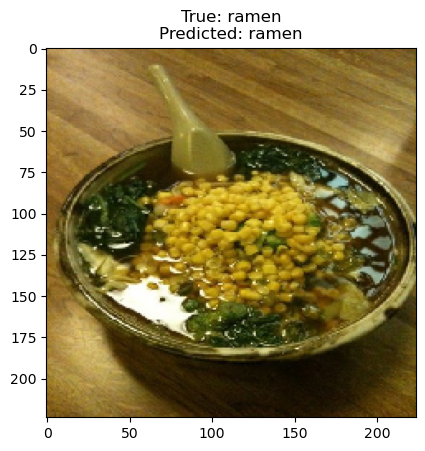

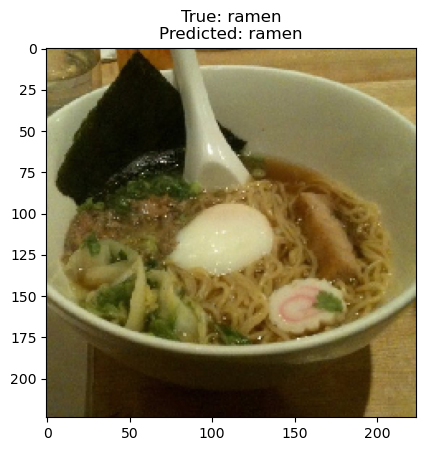

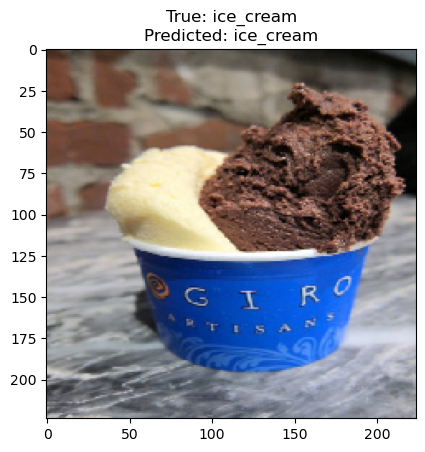

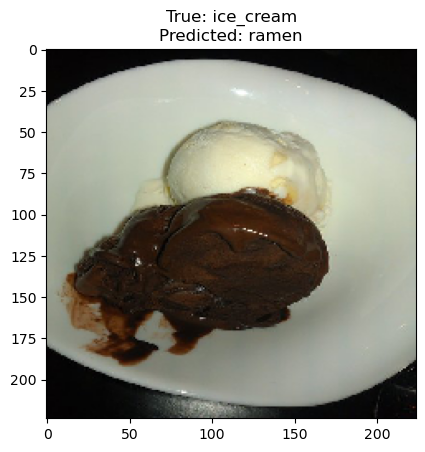

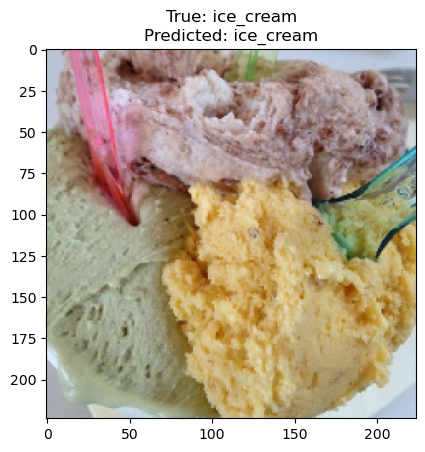

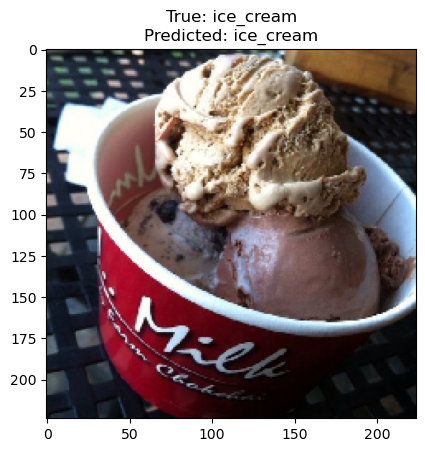

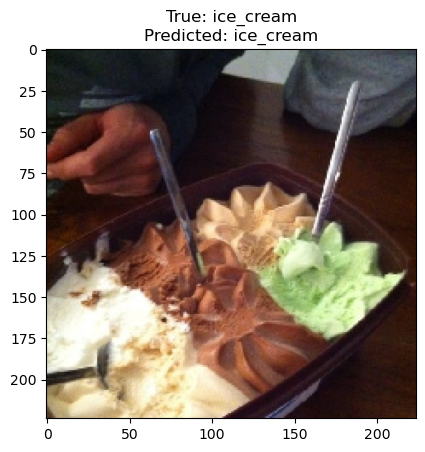

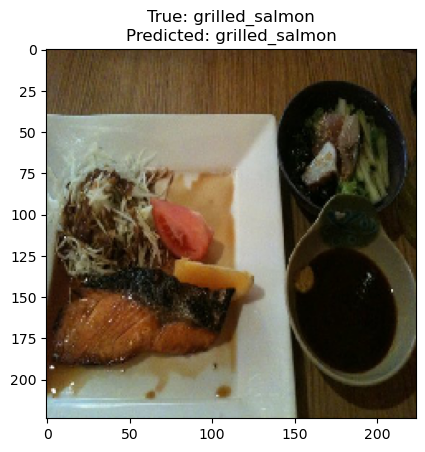

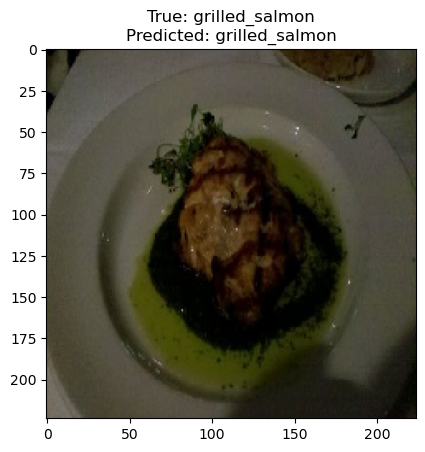

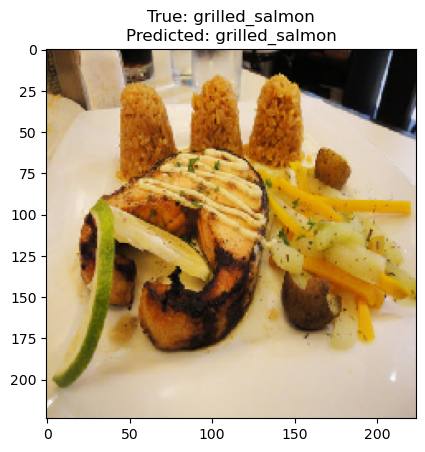

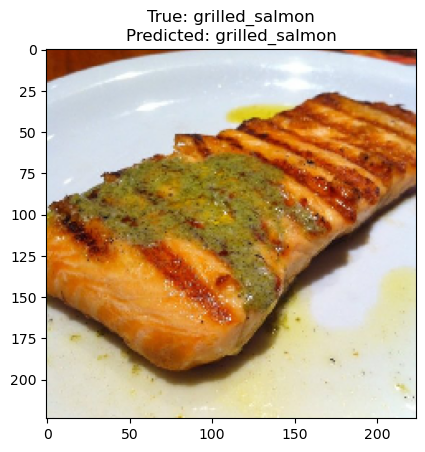

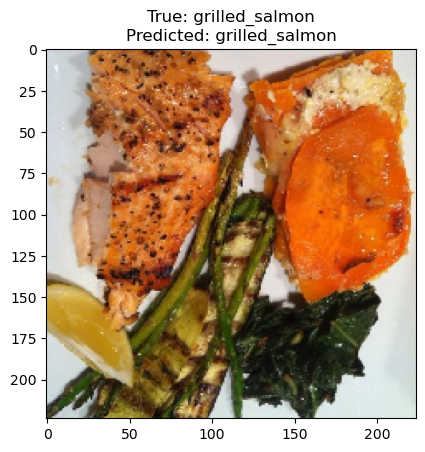

In [6]:
# Виведення 5 зображень з тестового набору різних класів та їх передбачень
num_images_per_class = 5

# Створення пустого списку для зображень та міток
display_images = []
display_labels = []

# Зчитування зображень з різних класів
for class_name in selected_classes:
    # Завантаження тестового набору для конкретного класу
    test_generator_class = test_datagen.flow_from_directory(test_data_dir, target_size=image_size, classes=[class_name], batch_size=num_images_per_class, class_mode='categorical', shuffle=False)

    # Отримання зображень та їх міток
    images, labels = next(test_generator_class)

    # Додавання зображень та міток до загального списку
    display_images.extend(images)
    display_labels.extend(labels)

# Перетасування зображень та міток
display_images = np.array(display_images)
display_labels = np.array(display_labels)

# Передбачення за допомогою моделі
predictions = model.predict(display_images)

# Виведення зображень та їх передбачень
for i in range(num_images_per_class * len(selected_classes)):
    plt.imshow(display_images[i])
    true_label_index = i // num_images_per_class
    true_label = class_names[true_label_index]
    predicted_label = class_names[np.argmax(predictions[i])]
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.show()

